In [10]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
plt.style.use('dark_background')

In [11]:
from datetime import datetime
dt_now = datetime.now()
yyyy = str(dt_now.year)
yy = yyyy[2:]
mm = str(dt_now.month)
mm = "0"+mm if len(mm)==1 else mm
dd = str(dt_now.day)
dd = "0"+dd if len(mm)==1 else dd

yyyymmdd = "{}/{}/{}".format(yyyy, mm, dd)
yymmdd = yy+mm+dd
print(yyyymmdd, yymmdd)

2018/11/25 181125


In [12]:
with open("dataset/gacrp-publicLB-{}.html".format(yymmdd)) as f:
    html = f.read()
soup = BeautifulSoup(html, "lxml")

# for i, row in enumerate(soup.findAll('tr')):
#     if i==0:
#         for element in row:
#             print(element)

In [13]:
cols = ['Rank', 'Change', 'TeamName', 'Kernel', 
        'TeamMembers', 'Score', 'NumberOfEntries', 'LastEntry']

contents = []
for i, row in enumerate(soup.findAll('tr')):
    row_list = row.findAll("td")  
    if len(row_list) == 8:
        for element in row_list:
            contents += [element.string]
        
data = pd.DataFrame(data = np.array(contents).reshape(int(len(contents)/8), len(cols)),
                    columns = cols).astype({"Rank": int, "Score": float, "NumberOfEntries": int})
data.head(3)

,Rank,Change,TeamName,Kernel,TeamMembers,Score,NumberOfEntries,LastEntry
0,1,—,Marwen Sallem,None,None,0.0,2,16d
1,2,—,Paulo Pinto,None,None,0.0,8,9d
2,3,—,Gautam,None,None,0.0,6,3d


In [14]:
num_team_zero_oneshot = data[(data["Score"] == 0) & (data["NumberOfEntries"]==1)].shape[0]
num_team_zero_all =  data[(data["Score"] == 0)].shape[0]
print("The number of the teams who submit only one submission whose score is zero:", num_team_zero_oneshot)
print("The number of the teams whose score is zero:", num_team_zero_all)

The number of the teams who submit only one submission whose score is zero: 226
The number of the teams whose score is zero: 404


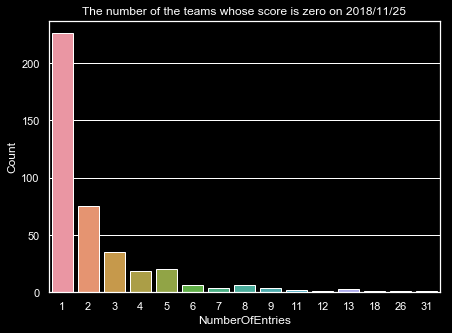

In [15]:
score_zero_subit_num = data[(data["Score"] == 0)]["NumberOfEntries"].value_counts().to_frame().reset_index()
score_zero_subit_num.rename(columns={"index": "NumberOfEntries", "NumberOfEntries": "Count"}, inplace=True)

plt.figure(figsize=(7,5))
ax = sns.barplot(x="NumberOfEntries", y="Count", data=score_zero_subit_num)
plt.title("The number of the teams whose score is zero on {}".format(yyyymmdd))
plt.savefig("output/score-zero-chart-{}.png".format(yymmdd), dpi=300)
plt.show()

In [16]:
score_zero_subit_num

,NumberOfEntries,Count
0,1,226
1,2,75
2,3,35
3,5,20
4,4,19
5,8,6
6,6,6
7,9,4
8,7,4
9,13,3
